In [2]:
import numpy as np
import numpy.linalg as la
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
%matplotlib inline

In [3]:
D=[2*.041,
   2*.044, #thrust bearing
   2*.051,
   2*.045,
   2*.045,
   2*.046, #journal bearing (tilt pad)
   2*.052,
   2*.058, #mechanical dry gas seal
   2*.051,
   2*.058,
   2*.059, #completion parts gas seal
   2*.060,
   2*.068, #seal
   2*.070,
   2*.079, #impeller 1
   2*.079,
   2*.079, #impeller 2
   2*.079,
   2*.079, #impeller 3
   2*.079,
   2*.079, #impeller 4
   2*.079, #gaxeta
   2*.079,
   2*.077, #impeller 5
   2*.077,
   2*.075, #impeller 6
   2*.075,
   2*.073, #impeller 7
   2*.073,
   2*.073, #seal (labiryth guess)
   2*.061, #seal
   2*.060,
   2*.059, #mechanical dry gas seal
   2*.058,
   2*.052,
   2*.057, #completion parts gas seal
   2*.052,
   2*.045, #journal bearing
   2*.044,
   2*.039,
   2*.038]

   
L=[.036,
   .057, #thrust bearing
   .012,
   .070,
   .022,
   .084, #journal bearing (tilt pad)
   .023,
   .035, #mechanical dry gas seal
   .013,
   .016,
   .080, #completion parts gas seal
   .042,
   .038, #seal
   .027,
   .055, #impeller 1
   .031,
   .068, #impeller 2
   .029, #gaxeta
   .066, #impeller 3
   .028,
   .067, #impeller 4
   .034, #gaxeta
   .045,
   .034, #impeller 5
   .057,
   .035, #impeller 6
   .053,
   .041, #impeller 7
   .060,
   .082, #seal (labiryth guess)
   .040, #seal
   .042,
   .081, #mechanical dry gas seal
   .015,
   .013,
   .034, #completion parts gas seal
   .022,
   .083, #journal bearing
   .027,
   .055,
   .051]
   

In [4]:
M = np.loadtxt('M.txt')
K = np.loadtxt('K.txt')
G = np.loadtxt('G.txt')
C = np.loadtxt('C.txt')

In [14]:
#desbalanceamento residual maximo
U=596.6e-6 #[kg.m]
n=int(np.sqrt(np.size(M)))
m=int(np.sqrt(np.size(M)))

#frequencias em rad/s

def resposta_frequencia(w0, wf):
    Omega = np.linspace(w0,wf,10*(wf-w0))
    X = sp.zeros((len(Omega), m))
    for i in range(len(Omega)):
        w=Omega[i]
        F=U*w**2*np.ones(m)

        Z=-1*w**2*M+1j*w*(C+G*w)+K
        Zinv=la.inv(Z)

        Xt=Zinv @ F
        Xabs = np.absolute(Xt)
        X[i] = sp.transpose(Xabs)

    return Omega, X

def resposta_tempo(x0, t, w):
    
       
    a11=np.zeros((n,n))
    a12=np.eye(n)
    a1=np.hstack([a11,a12])
    a2=np.hstack([la.solve(-1*M,K),la.solve(-1*M,(C+G*w))])
    A=np.vstack([a1, a2])
    
    B=np.zeros((2*n,1))
    B[n+1:2*n]=U*w**2
        
    C1 = np.ones((1,2*n))
    
    D = 0
    
    print(A.shape)
    print(B.shape)
    print(C1.shape)
    
    
    u = np.sin(w*t)
    
    sys = signal.lti(A,B,C1,D)
    tout, y, x = signal.lsim(sys, u, t, X0=x0)
    
    
    return tout, y, x

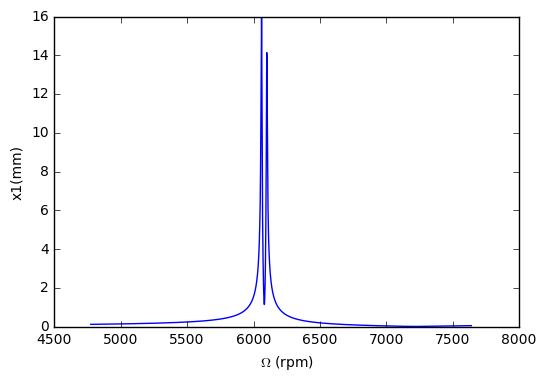

In [82]:
w,x=resposta_frequencia(500,800)
plt.plot(w*30/np.pi, x[:,0]*1000)
plt.xlabel('$\Omega$ (rpm)')
plt.ylabel('x1(mm)')

In [153]:
w1, x1 = resposta_frequencia(101.3*2*np.pi,102.3*2*np.pi)
analise = [100*x1[0,i] for i in range(3,165,4)]

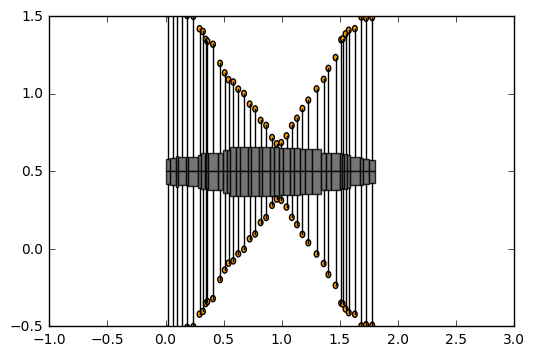

In [154]:
# analise de vibracao lateral

pos = range(len(L)) #posicao de cada elemento
fig, ax = plt.subplots()
plt.xlim([-1, 3])
plt.ylim([-.5,1.5])
line_height = [d+.5 for d in D]
for i in pos:
    xpos = sum(L[0:i])
    ax.add_patch(mpatches.Rectangle([xpos,0.5], L[i], D[i], facecolor='#525252', alpha=0.8)) #retangulo superior do eixo
    ax.add_patch(mpatches.Rectangle([xpos,0.5-D[i]], L[i], D[i], facecolor='#525252', alpha=0.8)) #retangulo inferior do eixo
    ax.add_line(mlines.Line2D((xpos+L[i]/2,xpos+L[i]/2), (.5-D[i]-analise[i], .5-D[i]), color='k')) #linhas inferiores
    ax.add_line(mlines.Line2D((xpos+L[i]/2,xpos+L[i]/2), (line_height[i]+analise[i], line_height[i]), color='k')) #linhas superiores
    ax.add_patch(mpatches.Circle((xpos+L[i]/2, .5-D[i]-analise[i]), .02, facecolor='#FF9900')) #circulos inferiores
    ax.add_patch(mpatches.Circle((xpos+L[i]/2, line_height[i]+analise[i]), .02, facecolor='#FF9900')) #circulos inferiores

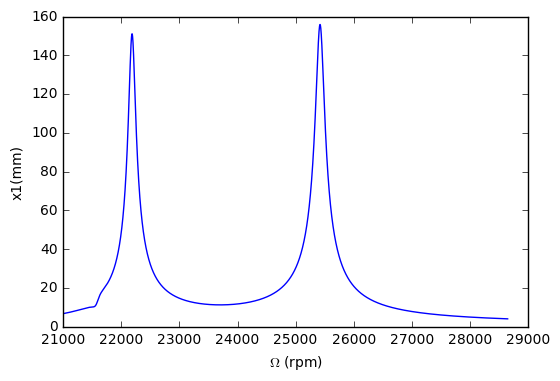

In [155]:
w,x=resposta_frequencia(2200,3000)
plt.plot(w*30/np.pi, x[:,0]*1000)
plt.xlabel('$\Omega$ (rpm)')
plt.ylabel('x1(mm)')

In [22]:
z = np.zeros(2*n)
t=np.linspace(0,10,10000)
tout, y, x = resposta_tempo(z,t,600)

(336, 336)
(336, 1)
(1, 336)


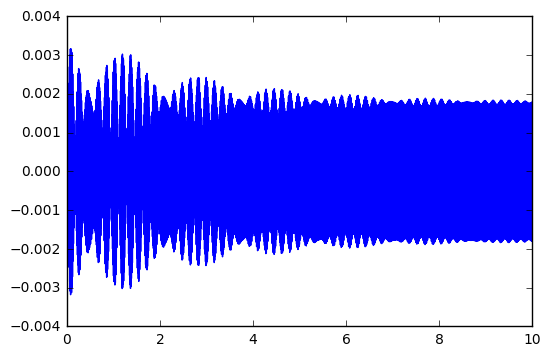

In [23]:
plt.plot(t,x[:,0])